In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import tree
import graphviz 

Predicting presidential political endorsements based on political views/demographics/local endorsements

# Data cleaning

In [2]:
dem = pd.read_csv('dem_candidates.csv')
rep = pd.read_csv('rep_candidates.csv')

In [3]:
rep.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Primary %', 'Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?'],
      dtype='object')

In [4]:
rep_important = rep[['Rep Party Support?',
       'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']].fillna(0).replace({'No': -1, 'Yes': 1})
rep_pred = rep[['Trump Endorsed?']].fillna(0).replace({'No': -1, 'Yes': 1})

In [5]:
set(rep_important.iloc[:, 0])

{-1, 0, 1}

In [6]:
dem.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

In [7]:
# Filter out relevant columns in dems dataset
dem_important = dem[['Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'Emily Endorsed?']].fillna(0).replace({'No': -1, 'Yes': 1})
dem_pred = dem[['Biden Endorsed?']].fillna(0).replace({'No': -1, 'Yes': 1})



In [8]:
# set(dem_endorse.iloc[:, 0])
set(dem_pred.iloc[:, 0])

{-1, 0, 1}

In [9]:
# dem_important[dem_important['Biden Endorsed?'] == -1]

### Dems EDA 

In [10]:
# EDA
dem_important[['Biden Endorsed?', 'Warren Endorsed? ','Sanders Endorsed?']].value_counts()

Biden Endorsed?  Warren Endorsed?   Sanders Endorsed?
 0                0                  0                   717
-1                0                  0                    29
 0               -1                  0                    21
                  0                 -1                    20
 1                0                  0                    10
 0                0                  1                     9
                  1                  0                     5
dtype: int64

In [11]:
dem_important[['Biden Endorsed?', 'Our Revolution Endorsed?', 'Justice Dems Endorsed?']].value_counts()

Biden Endorsed?  Our Revolution Endorsed?  Justice Dems Endorsed?
 0                0                         0                        399
                 -1                         0                        133
                                           -1                         89
                  1                         0                         51
                  0                        -1                         48
                  1                         1                         26
                  0                         1                         17
-1                0                         0                         16
 1                0                         0                          7
-1               -1                        -1                          5
 0                1                        -1                          5
-1               -1                         0                          4
 0               -1                         1             

In [12]:
# dem_important[dem_important['Warren Endorsed? '] == 1]

In [13]:
# dem_important[dem_important['Biden Endorsed?'] == 1]

In [14]:
# dem_endorse[dem_endorse['Sanders Endorsed?'] == 1]

In [15]:
# dem_important[dem_important['Our Revolution Endorsed?'] == -1]

# Decision trees

In [16]:
dem.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

In [17]:
dem_endorse = dem[['Party Support?', 'Our Revolution Endorsed?','No Labels Support?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'Emily Endorsed?', 'Guns Sense Candidate?']].fillna(0).replace({'No': -1, 'Yes': 1})

In [42]:
# Function written to run the decision tree
def runtree(featdf, preddf, maxdepth=2, random=0):
    clf = tree.DecisionTreeClassifier(random_state=random, max_depth=maxdepth)
    clf = clf.fit(featdf, preddf)
#     tree.plot_tree(clf)
    
    dot_data = tree.export_graphviz(clf, out_file=None) 
    dot_data = tree.export_graphviz(clf, out_file=None, 
                  feature_names=featdf.columns,  
                    filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data) 
    graph.format = 'png'
    graph.render('dtree_render',view=True)

    return graph

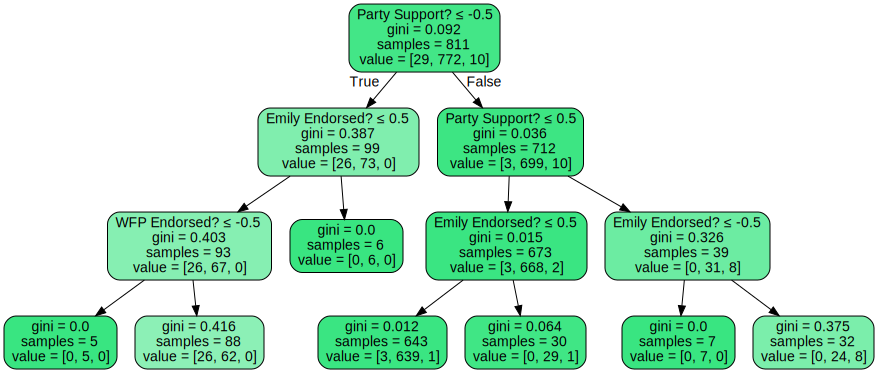

In [43]:
runtree(dem_endorse, dem_pred, 3, 42)

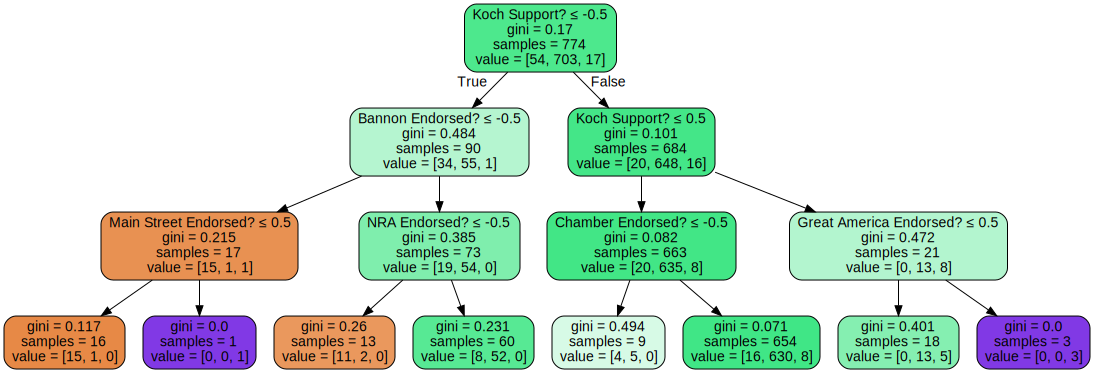

In [44]:
runtree(rep_important, rep_pred, 3, 42)

### Plot error of trees over different max depths

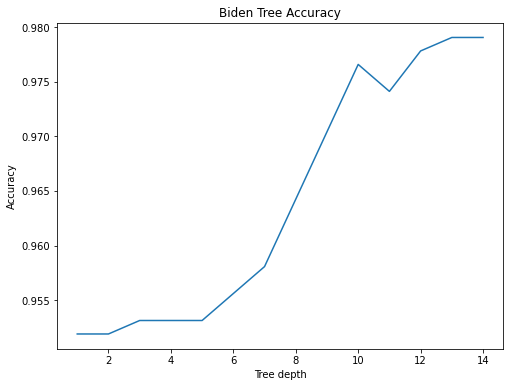

In [52]:
# Dems error line
score = []
for i in range(1,15):
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
    clf = clf.fit(dem_endorse, dem_pred)
    score += [clf.score(dem_endorse, dem_pred)]
    
plt.figure(figsize=(8,6))
plt.plot(range(1,15), score)
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.title('Biden Tree Accuracy')
plt.savefig('biden_tree_acc')
plt.show()

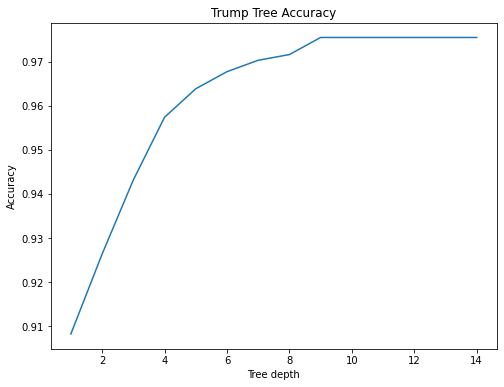

In [51]:
# Rep error line
score = []
for i in range(1,15):
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
    clf = clf.fit(rep_important, rep_pred)
    score += [clf.score(rep_important, rep_pred)]

plt.figure(figsize=(8,6))
plt.plot(range(1,15), score)
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.title('Trump Tree Accuracy')
plt.savefig('trump_tree_acc')
plt.show()

# Regressions

### Dem

In [23]:
log_dem_endorse = dem_endorse.replace({-1:0, 0:0.5})
log_dem_pred = dem_pred.replace({-1:0, 0:0.5})

In [24]:
clf = LinearRegression()
clf.fit(dem_endorse,
        dem_pred)

LinearRegression()

In [25]:
log_dem = sm.Logit(log_dem_pred, sm.add_constant(log_dem_endorse, prepend=False)).fit()
print(log_dem.summary())


Optimization terminated successfully.
         Current function value: 0.683646
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Biden Endorsed?   No. Observations:                  811
Model:                          Logit   Df Residuals:                      800
Method:                           MLE   Df Model:                           10
Date:                Mon, 10 May 2021   Pseudo R-squ.:                0.005157
Time:                        04:59:59   Log-Likelihood:                -554.44
converged:                       True   LL-Null:                       -557.31
Covariance Type:            nonrobust   LLR p-value:                    0.8360
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Party Support?               0.9420      0.406      2.322      0.020       0.147

In [26]:
log_dem_pred.iloc[:, 0]

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
806    0.5
807    0.5
808    0.5
809    0.5
810    0.5
Name: Biden Endorsed?, Length: 811, dtype: float64

In [27]:
# L2 loss function
np.mean((log_dem_pred.iloc[:,0].to_numpy() - log_dem.predict(sm.add_constant(log_dem_endorse, prepend=False)).to_numpy())**2)

0.009361732789331955

In [28]:
predictions = log_dem.predict(sm.add_constant(log_dem_endorse, prepend=False))

rounded = np.round_(predictions, decimals = 1)
sum(np.abs(log_dem_pred.iloc[:,0].to_numpy() - rounded.to_numpy()))

26.500000000000014

In [29]:
sum(rounded != log_dem_pred.iloc[:,0])/len(log_dem_pred)

0.17632552404438964

### Rep

In [30]:
log_rep_important = rep_important.replace({-1:0, 0:0.5})
log_rep_pred = rep_pred.replace({-1:0, 0:0.5})

In [31]:
log_rep = sm.Logit(log_rep_pred, sm.add_constant(log_rep_important, prepend=False)).fit()
print(log_rep.summary())

Optimization terminated successfully.
         Current function value: 0.668550
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Trump Endorsed?   No. Observations:                  774
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                           13
Date:                Mon, 10 May 2021   Pseudo R-squ.:                 0.01692
Time:                        04:59:59   Log-Likelihood:                -517.46
converged:                       True   LL-Null:                       -526.36
Covariance Type:            nonrobust   LLR p-value:                    0.1649
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Rep Party Support?            -0.1146      0.358     -0.320      0.749      

In [32]:
# L2 Loss function
np.mean((log_rep_pred.iloc[:,0].to_numpy() - log_rep.predict(sm.add_constant(log_rep_important, prepend=False)).to_numpy())**2)

0.015298504302500994

In [33]:
predictions = log_rep.predict(sm.add_constant(log_rep_important, prepend=False))

rounded = np.round_(predictions, decimals = 1)
sum(np.abs(log_rep_pred.iloc[:,0].to_numpy() - rounded.to_numpy()))

42.90000000000007

In [34]:
sum(rounded != log_rep_pred.iloc[:,0])/len(log_rep_pred)

0.2648578811369509